# Men's team unlikely to medal in floor

## scaling not needed


In [33]:
import pandas as pd
import numpy as np
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, fbeta_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

In [34]:
df = pd.read_csv('../../Combine_Data/men/fx_encoded.csv')
olymp = pd.read_csv('../../Data/cleandata22-23/encoded_m_olympics_fx.csv')
fxnames = pd.read_csv('../../Data/cleandata22-23/encoded_m_olympics_fxnames.csv')
fxolymp = pd.read_csv('../../Data/cleandata22-23/men22_23.csv')


In [35]:
df

,Rank,D,E,ND,year,Total,medal,Name,Nation,round_final,round_qual
0,1,6.2,8.366,0.0,2019,14.566,0,62,56,True,False
1,2,5.9,8.600,0.0,2019,14.500,0,122,40,True,False
2,3,6.1,8.400,0.0,2019,14.500,1,262,25,True,False
3,3,6.1,8.400,0.0,2019,14.500,0,90,81,True,False
4,5,6.2,8.000,0.0,2019,14.200,0,168,64,True,False
...,...,...,...,...,...,...,...,...,...,...,...
533,196,4.3,6.200,0.0,2018,10.500,0,11,60,False,True
534,197,3.9,6.533,0.0,2018,10.433,0,308,6,False,True
535,198,2.7,6.566,0.0,2018,9.266,0,117,81,False,True
536,199,4.1,5.166,-0.2,2018,9.466,0,324,63,False,True


In [36]:
y = df['medal']
X = df.drop(columns=['medal'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "Neural Network": MLPClassifier(),
}

results = {}

# Iterate through each classifier
for name, clf in classifiers.items():
    # Create a pipeline with StandardScaler for classifiers that require it
    if name in ["SVM", "K-Nearest Neighbors", "Neural Network"]:
        clf = make_pipeline(StandardScaler(), clf)

    # Fit the model to the training data
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    results[name] = {
        "accuracy": accuracy,
        "classification_report": report,
        "confusion_matrix": conf_matrix,
    }

# Print the results
for name, result in results.items():
    print(f"Classifier: {name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"Classification Report:\n{result['classification_report']}")
    print(f"Confusion Matrix:\n{result['confusion_matrix']}\n")


/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classifier: Random Forest
Accuracy: 0.9815
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       105
           1       1.00      0.33      0.50         3

    accuracy                           0.98       108
   macro avg       0.99      0.67      0.75       108
weighted avg       0.98      0.98      0.98       108

Confusion Matrix:
[[105   0]
 [  2   1]]

Classifier: AdaBoost
Accuracy: 0.9815
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       105
           1       1.00      0.33      0.50         3

    accuracy                           0.98       108
   macro avg       0.99      0.67      0.75       108
weighted avg       0.98      0.98      0.98       108

Confusion Matrix:
[[105   0]
 [  2   1]]

Classifier: SVM
Accuracy: 0.9722
Classification Report:
              precision    recall  f1-score   support

           0       0.97 

/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Classifier: Random Forest
Accuracy: 0.9815

Classifier: AdaBoost
Accuracy: 0.9815

In [37]:
X_train.head()

,Rank,D,E,ND,year,Total,Name,Nation,round_final,round_qual
386,49,5.3,8.400,0.0,2018,13.700,312,44,False,True
231,152,4.5,8.433,-0.4,2019,13.333,110,50,False,True
349,12,5.9,8.300,0.0,2018,14.200,186,27,False,True
448,111,4.8,8.500,-0.3,2018,13.600,31,8,False,True
302,9,5.4,8.500,0.0,2020,13.900,68,77,True,False


In [38]:
olymp.head()


,Rank,D Score,E Score,Pen.,Total,year,Name,nation,round_AAfinal,round_TeamFinal,round_TeamQual,round_final,round_qual
0,54.0,4.0,8.566,0.0,12.566,2023,236,67,False,False,False,False,True
1,13.0,5.5,8.300,0.0,13.800,2022,527,30,True,False,False,False,False
2,48.0,5.5,7.900,0.0,13.400,2022,527,30,False,False,False,False,True
3,86.0,5.4,7.133,0.1,12.433,2022,527,30,False,False,False,False,True
4,21.0,5.5,8.666,0.0,14.166,2023,527,30,False,False,False,False,True


In [39]:
olymp.rename(columns={'D Score': 'D', 'E Score': 'E',
                     'Pen.': 'ND', 'nation': 'Nation'}, inplace=True)

In [40]:
olymp=olymp.drop(columns=['round_TeamFinal', 'round_AAfinal', 'round_TeamQual']) 

In [41]:
desired_column_order = ['Rank', 'D', 'E', 'ND', 'year', 'Total', 'Name', 'Nation',
       'round_final', 'round_qual'] # Add all your column names in the desired order

# Create a new DataFrame with the desired column order
olymp = olymp[desired_column_order]

In [42]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier


# Initialize the AdaBoost classifier
clf = AdaBoostClassifier(n_estimators=31)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_prob = clf.predict_proba(X_test)[:, 1]  # Get the probability of class 1

# Adjust the threshold (you can experiment with different thresholds)
threshold = 0.18 # Example threshold, you can adjust it based on your needs
y_pred_adjusted = (y_pred_prob > threshold).astype(int)

# Evaluate the model's performance with the adjusted threshold
accuracy = accuracy_score(y_test, y_pred_adjusted)
report = classification_report(y_test, y_pred_adjusted)
conf_matrix = confusion_matrix(y_test, y_pred_adjusted)

# Print the results
print("AdaBoost Classifier with Adjusted Threshold")
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")


AdaBoost Classifier with Adjusted Threshold
Accuracy: 0.9815
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       105
           1       0.60      1.00      0.75         3

    accuracy                           0.98       108
   macro avg       0.80      0.99      0.87       108
weighted avg       0.99      0.98      0.98       108

Confusion Matrix:
[[103   2]
 [  0   3]]


# Feature Importance

AdaBoost Classifier with Adjusted Threshold
Accuracy: 0.9815
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       105
           1       0.60      1.00      0.75         3

    accuracy                           0.98       108
   macro avg       0.80      0.99      0.87       108
weighted avg       0.99      0.98      0.98       108

Confusion Matrix:
[[103   2]
 [  0   3]]


/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `base_estimator_` was deprecated in version 1.2 and will be removed in 1.4. Use `estimator_` instead.
  warnings.warn(msg, category=FutureWarning)


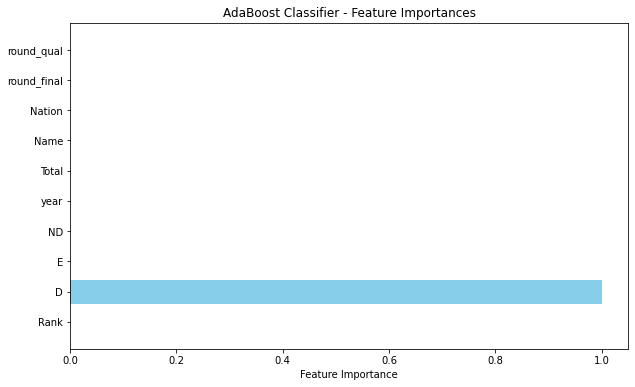

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [45]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt


# Initialize the AdaBoost classifier with a base classifier that supports feature_importances_
base_classifier = clf.base_estimator_  # Get the base classifier from AdaBoost
base_classifier.fit(X_train, y_train)  # Fit the base classifier

clf = AdaBoostClassifier(base_classifier, n_estimators=31)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Extract feature importances from the base classifier
feature_importances = clf.estimator_.feature_importances_

# Make predictions on the test data
y_pred_prob = clf.predict_proba(X_test)[:, 1]  # Get the probability of class 1

# Adjust the threshold (you can experiment with different thresholds)
threshold = 0.18  # Example threshold, you can adjust it based on your needs
y_pred_adjusted = (y_pred_prob > threshold).astype(int)

# Evaluate the model's performance with the adjusted threshold
accuracy = accuracy_score(y_test, y_pred_adjusted)
report = classification_report(y_test, y_pred_adjusted)
conf_matrix = confusion_matrix(y_test, y_pred_adjusted)

# Print the results
print("AdaBoost Classifier with Adjusted Threshold")
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('AdaBoost Classifier - Feature Importances')
plt.show()
feature_importances

In [11]:
y_pred = clf.predict(olymp)


In [12]:
ypreds  = pd.Series(y_pred)
olymp['ypred']=ypreds


In [13]:
olymp['ypred'].value_counts()

ypred
0    2418
1      21
Name: count, dtype: int64

In [14]:
filtered_df = olymp[olymp['ypred'] == 1]

In [15]:
filtered_df['Name'].unique()

array([264, 308, 733, 451, 333, 603])

In [16]:
name_encoded_values = [264, 308, 733, 451, 333]

# Filter the DataFrame to get the corresponding "Name" values
result = fxnames.loc[fxnames['Name_encoded'].isin(name_encoded_values), 'Name']


In [17]:
result.unique()

array(['harry hepworth', 'jake jarman', 'weide su', 'luke whitehouse',
       'jiaxing yang'], dtype=object)

In [18]:
fxolymp["Name"]=fxolymp["Name"].str.lower()

In [19]:
names_to_filter = ['harry hepworth', 'jake jarman', 'weide su', 'luke whitehouse',
       'jiaxing yang']

# Filter the DataFrame to get rows with the specified "Name" values
result = fxolymp[fxolymp['Name'].isin(names_to_filter)]


In [20]:
result['Country'].value_counts()

Country
GBR    208
CHN     32
ENG     15
Name: count, dtype: int64

In [21]:
usa = result[result['Country']=='USA']

In [22]:
usa['Name'].value_counts()

Series([], Name: count, dtype: int64)